In [64]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model, metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor


In [65]:
class DataStorage:
  _data = None

  def __init__(self, file_name):
    self._data = pd.read_csv(file_name)

  @property
  def data(self):
    return self._data

  def set_property(self, property_name, value):
    self._data[property_name] = value

  def overwrite_data(self, data):
    self._data = data


In [66]:
cars = DataStorage('car_price_prediction.csv')
cars.data



,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [67]:
class DataAnalyzer:
  def showDataMetrics(data):
    print(data.describe())
    print(data.info())
    print(data.isnull().values.any())


In [68]:
DataAnalyzer.showDataMetrics(cars.data)


                 ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy          

In [69]:
class BoxPlot:
  def show(data):
    data.plot(kind='box')
    plt.show()


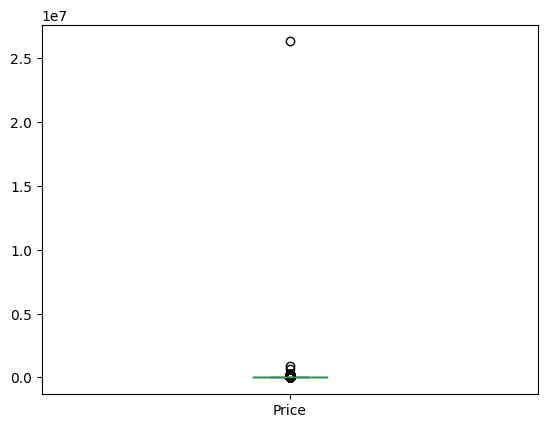

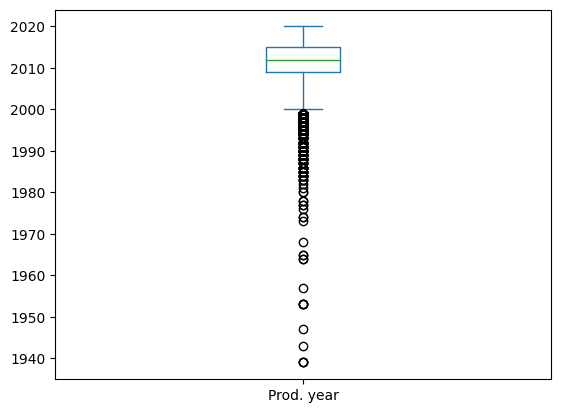

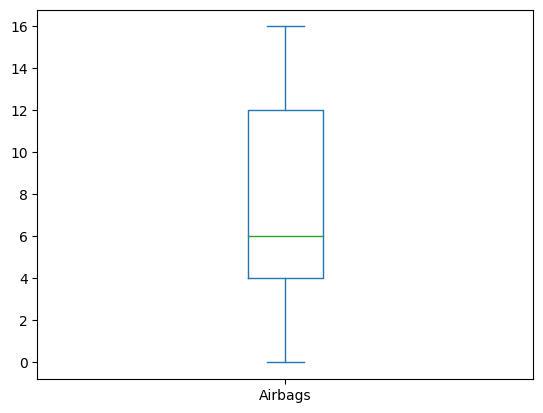

In [70]:
BoxPlot.show(cars.data['Price'])
BoxPlot.show(cars.data['Prod. year'])
BoxPlot.show(cars.data['Airbags'])


In [71]:
class DataNormalizer:
  def __init__(self, data):
    self.data = data

  def remove_dashes(self):
    self.data = self.data.replace('-', 0)
    return self

  def parse_float(self, field):
    self.data[field] = self.data[field].astype(float)
    return self

  def remove_string(self, field, string_to_remove):
    self.data[field] = self.data[field].str.replace(string_to_remove, '')
    return self

  def remove_outliers(self, condition):
    self.data = self.data.drop(self.data[condition].index)
    return self

  def remove_fields(self, fields):
    self.data = self.data.drop(fields, axis=1)
    return self

  def shuffle(self):
    self.data = shuffle(self.data)
    return self


In [72]:
normalize = DataNormalizer(cars.data)
normalize.remove_dashes().parse_float('Levy')

normalize.remove_dashes().parse_float('Levy').remove_string('Engine volume', 'Turbo').parse_float(
    'Engine volume').remove_string('Mileage', 'km').parse_float('Mileage')

cars.overwrite_data(normalize.data)
cars.data


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [73]:
class LabelEncoder:
  def __init__(self, data):
    self.data = data
  le = preprocessing.LabelEncoder()

  def encode_fields(self, fields):
    for field in fields:
      self.data[field] = self.le.fit_transform(self.data[field])
    return self


In [74]:
label_encoder = LabelEncoder(cars.data)
label_encoder.encode_fields(['Manufacturer', 'Category', 'Fuel type',
                            'Gear box type', 'Drive wheels', 'Leather interior'])
cars.overwrite_data(label_encoder.data)
cars.data


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,32,RX 450,2010,4,1,2,3.5,186005.0,6.0,0,0,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,8,Equinox,2011,4,0,5,3.0,192000.0,6.0,2,0,04-May,Left wheel,Black,8
2,45774419,8467,0.0,21,FIT,2006,3,0,5,1.3,200000.0,4.0,3,1,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,16,Escape,2011,4,1,2,2.5,168966.0,4.0,0,0,04-May,Left wheel,White,0
4,45809263,11726,446.0,21,FIT,2014,3,1,5,1.3,91901.0,4.0,0,1,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0.0,36,CLK 200,1999,1,1,0,2.0,300000.0,4.0,1,2,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,23,Sonata,2011,9,1,5,2.4,161600.0,4.0,2,1,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,23,Tucson,2010,4,1,1,2.0,116365.0,4.0,0,1,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,8,Captiva,2007,4,1,1,2.0,51258.0,4.0,0,1,04-May,Left wheel,Black,4


In [75]:
normalize.remove_outliers(cars.data['Price'] > 600000).remove_outliers(
    cars.data['Prod. year'] < 1960).remove_outliers(cars.data['Levy'] > 7000).remove_outliers(cars.data['Engine volume'] > 10)
cars.overwrite_data(normalize.data)


/var/folders/f7/yqbvhnk96wzd_fjkwh5c6xz40000gp/T/ipykernel_6843/3640559317.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.data = self.data.drop(self.data[condition].index)


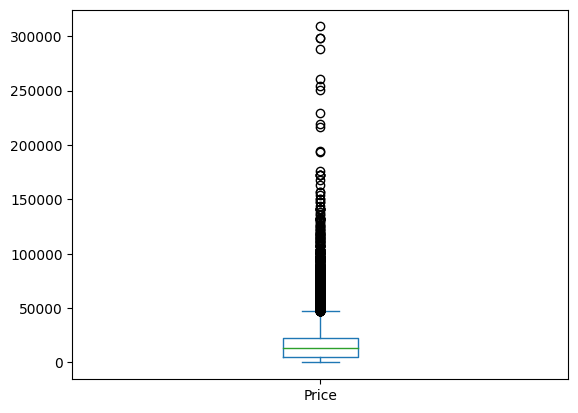

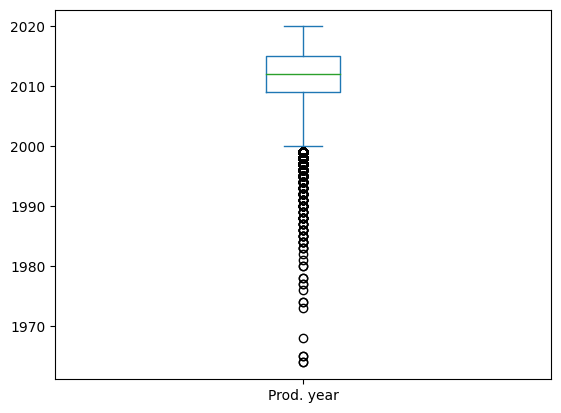

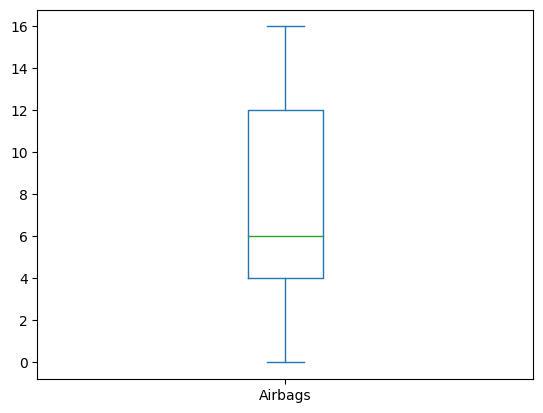

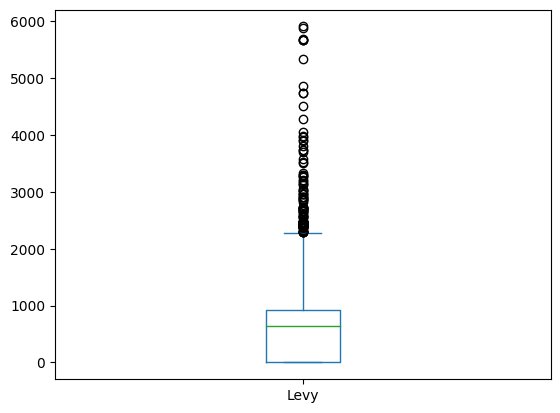

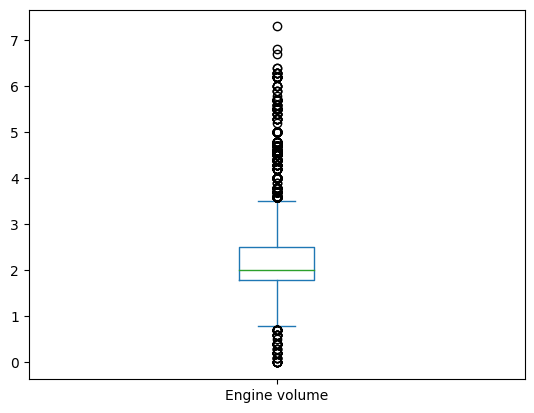

In [76]:
BoxPlot.show(cars.data['Price'])
BoxPlot.show(cars.data['Prod. year'])
BoxPlot.show(cars.data['Airbags'])
BoxPlot.show(cars.data['Levy'])
BoxPlot.show(cars.data['Engine volume'])


In [77]:
normalize.remove_fields(['ID', 'Model', 'Wheel', 'Color', 'Doors'])
cars.overwrite_data(normalize.data)
cars.data.head()


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,32,2010,4,1,2,3.5,186005.0,6.0,0,0,12
1,16621,1018.0,8,2011,4,0,5,3.0,192000.0,6.0,2,0,8
2,8467,0.0,21,2006,3,0,5,1.3,200000.0,4.0,3,1,2
3,3607,862.0,16,2011,4,1,2,2.5,168966.0,4.0,0,0,0
4,11726,446.0,21,2014,3,1,5,1.3,91901.0,4.0,0,1,4


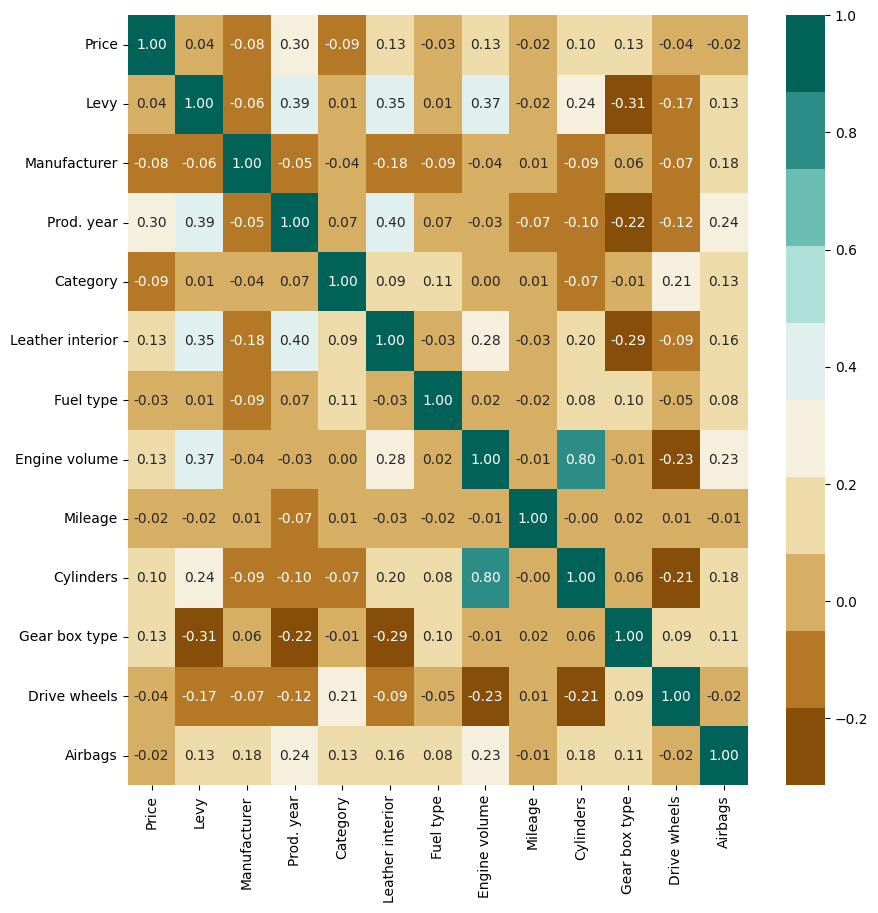

In [78]:

class CorrelationMatrix:
  def __init__(self, data):
    self.data = data

  def show(self):
    correlations = self.data.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(correlations,
                cmap=colormap,
                annot=True,
                fmt=".2f")
    plt.show()


correlation_matrix = CorrelationMatrix(cars.data)
correlation_matrix.show()


In [79]:
normalize.shuffle()
cars.overwrite_data(normalize.data)


In [80]:
class FormatData:
  def __init__(self, data):
    self.data = data

  def get_x_y(self):
    X = self.data.drop('Price', axis=1).to_numpy()
    y = self.data['Price'].to_numpy()
    return X, y

  def split_data(self, X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


format_data = FormatData(cars.data)
X, y = format_data.get_x_y()
X_train, X_test, y_train, y_test = format_data.split_data(X, y)


In [81]:
class Model:
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

  def train(self, classifier, feature_vector_train, label, feature_vector_valid):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    score_vals = [
        metrics.mean_squared_error(predictions, self.y_test),
        metrics.mean_absolute_error(predictions, self.y_test)
    ]
    return score_vals

  def linear_regression(self):
    accuracy = self.train(
        linear_model.LinearRegression(), self.X_train, self.y_train, self.X_test)
    return accuracy

  def random_forest(self, n_estimators=100, random_state=42):
    regressor = RandomForestRegressor(
        n_estimators=n_estimators, random_state=random_state)
    accuracy = self.train(regressor, self.X_train, self.y_train, self.X_test)
    return accuracy, regressor


In [82]:
model = Model(X_train, y_train, X_test, y_test)
lr_accuracy = model.linear_regression()
rf_accuracy, regressor = model.random_forest()


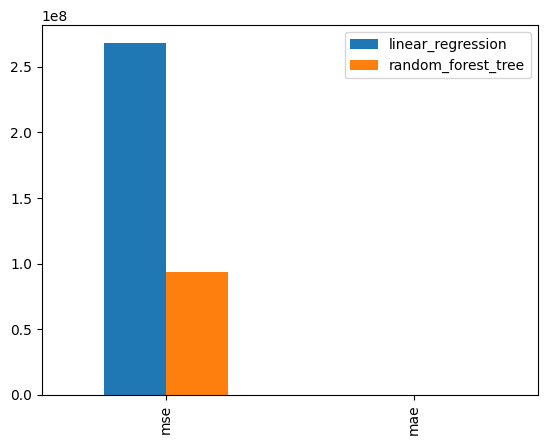

In [83]:
class CompareModels:
  def __init__(self, accuracy_compare):
    self.accuracy_compare = accuracy_compare

  def show(self):
    df_compare = pd.DataFrame(self.accuracy_compare, index=['mse', 'mae'])
    df_compare.plot(kind='bar')

  def get_best_model(self):
    return min(self.accuracy_compare, key=self.accuracy_compare.get)
  def get_best_accuracy(self):
    return min(self.accuracy_compare.values())

  def add_to_compare(self, model_name, accuracy):
    self.accuracy_compare[model_name] = accuracy


accuracy_compare = {'linear_regression': lr_accuracy,
                    'random_forest_tree': rf_accuracy}
compare_models = CompareModels(accuracy_compare)
compare_models.show()


random_forest_tree is the best model with accuracy [93884179.23066297, 4509.723500319281]


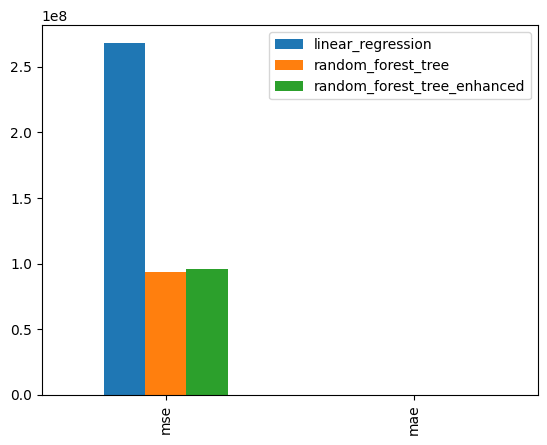

In [84]:
accuracy, regressor = model.random_forest(n_estimators=400, random_state=0)

compare_models.add_to_compare('random_forest_tree_enhanced', accuracy)
print(f'{compare_models.get_best_model()} is the best model with accuracy {compare_models.get_best_accuracy()}')
compare_models.show()


In [85]:
import pickle

with open('dwarf_classifier_model.pickle', 'wb') as handle:
  pickle.dump(regressor, handle)
